# Workgroup 3 R 

# 1. Multicollinearity 

The multicollinearity  is the dependency of two o more explicatives variables in a model regression; specific, put away the Gauss-Markov condition. It's important to say that the dependency of the variables has to be strong to be consider a multicollinearity case. 

It can be consider two cases of multi:exact multicollinearity and approximately multicollinearity.

The first type of multicollinearity consists in a variable or variables depends linealy of other.


$$ 
Y_i = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon   ... (1) ;  
$$


$$
X_1 = 2.X_2 - 3.X_3
$$

For example, in the ecuacion 1 represents a exact multicollinearity case because a variable depends linealy of others. The real problem of this kind of multicollinearity it's that it wouldn't be possible estimate the coefficients of the regresors. Remember: 

$$
\hat{\beta} = (X'X)^{-1}(X'Y) ... (2)
$$

So, if exist multi. exact, the matrix $(X'X)$ will have determinant equal to zero, so it won't be invertible.  

The other case of multi: approximately multi consists in a variable of variables depends of other but no its exclusive a lineal combination. For example:

$$
Y_i = \beta_0 + \beta_1 X_1 + \beta_2  X_2+ \beta_3 X_3+ \epsilon   ... (3) ;  
$$

$$
X_3 = 2X_1 + v_i, v_i \sim N(0, \sigma^2)
$$

The ecuation shows that $X_3$ its aproximaly a lineal combination of other variable; the problem with this case, its that matrix $(X'X)$ equation 2 will be approximately zero and the coeficient would be affected. 

* A way to solution the multicollinearity problem it's delete the variable that causes it. 

# Matrix 

In [2]:
set.seed(123)
n = 10

In [3]:

a <- rnorm(10)
b <- rnorm(10)
c <- rnorm(10)
d <- rnorm(10)
e <- rnorm(10)
f <- rnorm(10)
g <- rnorm(10)
h <- rnorm(10)
i <- rnorm(10)
j <- 2*i+3*h+g


In [4]:
j

[1] -1.0819256 -6.6592693  1.9426881 -1.8574246 -3.5767902  4.0438067
 [7]  1.7875688 -2.7387859  0.8143147  3.9310258

In [7]:
A <- matrix(c(a, b, c , d, e, f, g, h, i, j),  nrow=10, ncol = 10, byrow=FALSE)
A

-0.56047565,1.2240818,-1.0678237,0.42646422,-0.69470698,0.25331851,0.37963948,-0.4910312,0.005764186,-1.0819256
-0.23017749,0.3598138,-0.2179749,-0.29507148,-0.20791728,-0.02854676,-0.50232345,-2.3091689,0.385280401,-6.6592693
1.55870831,0.4007715,-1.0260044,0.89512566,-1.26539635,-0.04287046,-0.33320738,1.0057385,-0.370660032,1.9426881
0.07050839,0.1106827,-0.7288912,0.87813349,2.16895597,1.36860228,-1.01857538,-0.7092008,0.644376549,-1.8574246
0.12928774,-0.5558411,-0.6250393,0.82158108,1.20796200,-0.22577099,-1.07179123,-0.6880086,-0.220486562,-3.5767902
1.71506499,1.7869131,-1.6866933,0.68864025,-1.12310858,1.51647060,0.30352864,1.0255714,0.331781964,4.0438067
0.46091621,0.4978505,0.8377870,0.55391765,-0.40288484,-1.54875280,0.44820978,-0.2847730,1.096839013,1.7875688
-1.26506123,-1.9666172,0.1533731,-0.06191171,-0.46665535,0.58461375,0.05300423,-1.2207177,0.435181491,-2.7387859
-0.68685285,0.7013559,-1.1381369,-0.30596266,0.77996512,0.12385424,0.92226747,0.1813035,-0.325931586,0.8143147
-0.44566197,-0.4727914,1.2538149,-0.38047100,-0.08336907,0.21594157,2.05008469,-0.1388914,1.148807618,3.9310258


In [8]:
print(det(A))

[1] 0


In [9]:
solve(A)


ERROR: Error in solve.default(A): Lapack routine dgesv: system is exactly singular: U[10,10] = 0


The fact that we have the 10th vector as a linear combination of the other three vectors makes that the determinat of the A matrix be 0. This means that we won't be able to get the inverse of A matrix. It's important to be able to get the inverse of our matrix if we would like to get our estimators. 

# Analyzing RCT data with Precision Adjustment

# Data
In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data.

In [1]:
## loading the data
Penn <- as.data.frame(read.table("../../data/penn_jae.dat", header=T ))
Penn

abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
10635,2,7,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
10551,5,18,6,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10544,6,7,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10845,1,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
10670,3,3,3,1,0,0,0,2,0,...,0,0,0,1,0,0,0,0,0,1
10768,3,28,11,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
dim(Penn)

[1] 13913    23

In [3]:
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)

In [4]:
T2<- (tg==2)
summary(T2)

   Mode   FALSE    TRUE 
logical    3354    2428 

In [5]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0


In [6]:
#summarize variables 
summary(Penn)

      abdt             tg            inuidur1        inuidur2    
 Min.   :10404   Min.   :0.0000   Min.   : 1.00   Min.   : 0.00  
 1st Qu.:10600   1st Qu.:0.0000   1st Qu.: 3.00   1st Qu.: 2.00  
 Median :10698   Median :0.0000   Median :11.00   Median :10.00  
 Mean   :10696   Mean   :0.8398   Mean   :13.03   Mean   :12.25  
 3rd Qu.:10796   3rd Qu.:2.0000   3rd Qu.:25.00   3rd Qu.:23.00  
 Max.   :10880   Max.   :2.0000   Max.   :52.00   Max.   :52.00  
     female           black           hispanic          othrace        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.000000  
 Mean   :0.4007   Mean   :0.1188   Mean   :0.03632   Mean   :0.005189  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.000000  
      dep               q1        

# Historgram´s plot  for treatment and control group

In [8]:
#to see the distribution of the outcome variable inuidur1

In [7]:
pen_cont = Penn[Penn$tg==0,]
pen_tr = Penn[Penn$tg==2,]
head(pen_cont)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
14,10845,0,27,27,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
15,10831,0,9,9,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [8]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


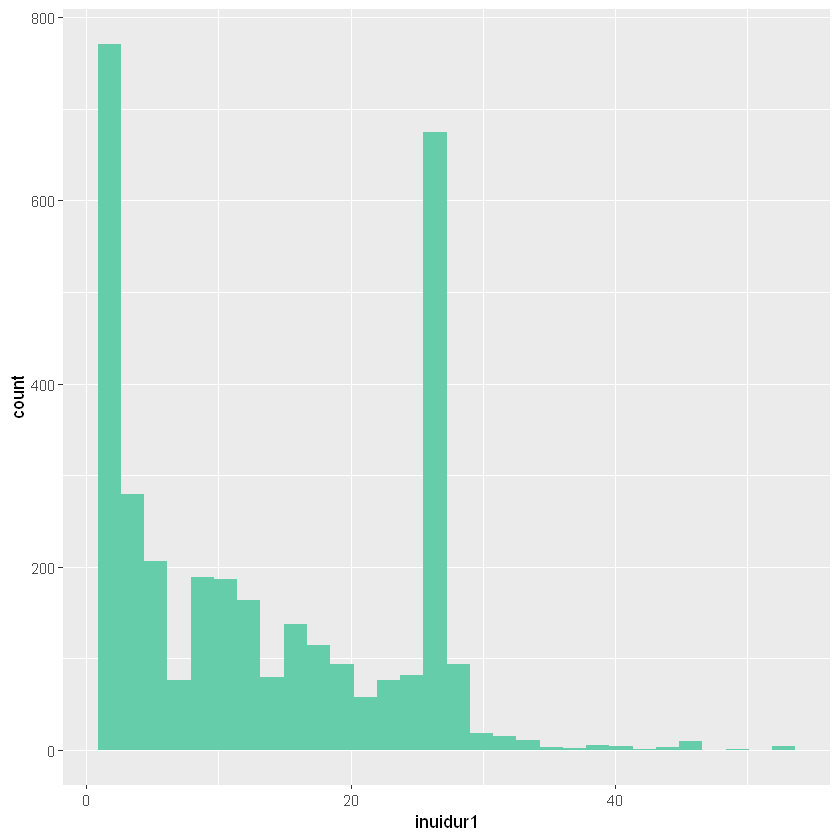

In [9]:
ggplot(NULL, aes(inuidur1)) +geom_histogram(data=pen_cont, fill="#66CDAA", binwidth=)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


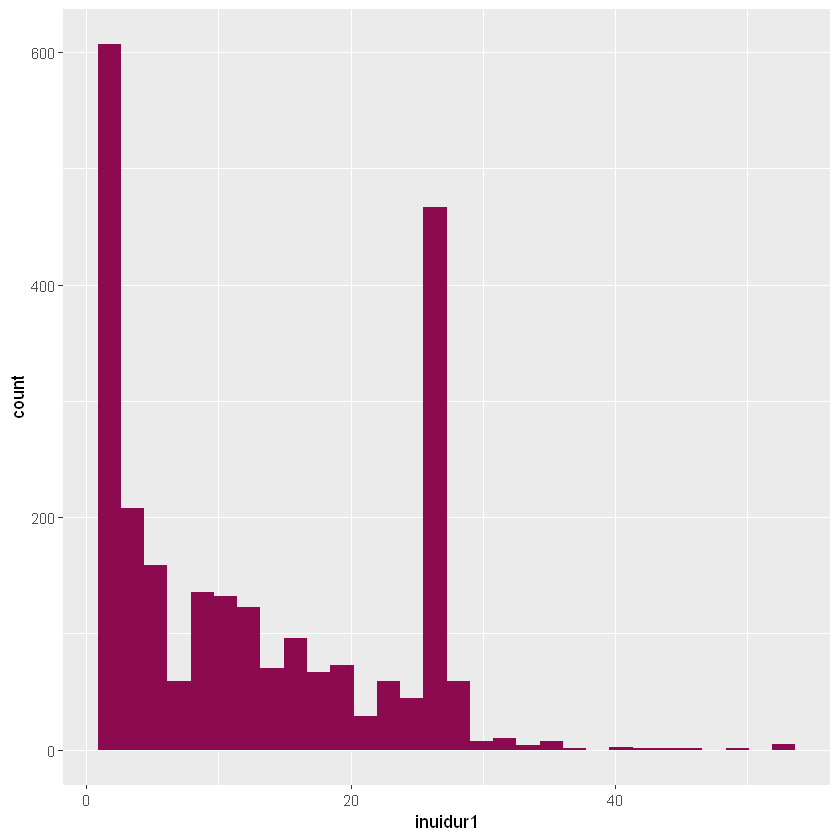

In [10]:
ggplot(NULL, aes(inuidur1)) + geom_histogram(data=pen_tr, fill="#8B0A50")

In [ ]:
The histograms shows that the distribution for both groups are similiar. The difference between the weeks of unemployement at the benining of the period might be because the treatment group has less observations than the control group.

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient  𝛽1  has the interpretation of the causal effect of the treatment on the average outcome. We thus refer to  𝛽1  as the average treatment effect (ATE). Note that the covariates, here are independent of the treatment  𝐷 , so we can identify  𝛽1  by just linear regression of  𝑌  on  𝐷 , without adding covariates. However we do add covariates in an effort to improve the precision of our estimates of the average treatment effect.

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL)
*  classical linear regression adjustment (CRA)
*  interactive regression adjusment (IRA)

and carry out robust inference using the *estimatr* R packages. 

# Carry out covariate balance check

This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [11]:
library(lmtest)
library(sandwich)

Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [12]:
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)

coeftest(m, vcov = vcovHC(m, type="HC1"))


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

In [13]:
# get same dataframe

X <- as.data.frame( model.matrix(m) )

head(X) 
length(X)


(Intercept),female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,q5,...,agelt35:agegt54,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd,lusd:husd
1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0


[1] 120

In [14]:
no_col <- attributes(m$coefficients)$names[is.na(m$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]
names(X1)[2] <- "T2"


In [ ]:
save( X1, file = "../../data/m_reg2.RData")

# Analyzing RCT data with Precision Adjustment

## 1. & 2. No adjustment (2-sample approach) (CL) & classical linear regression adjustment (CRA)

In [15]:

# no adjustment (2-sample approach)
formula_cl <- log(inuidur1)~T2

# adding controls

formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2

# Omitted dummies: q1, nondurable, muld


ols.cl_reg <- lm(formula_cl)
ols.cra_reg <- lm(formula_cra)


ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1"))
ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))

print(ols.cl)
print(ols.cra)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5 

In [16]:
 #interactive regression model

X <- model.matrix(~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1] #without intercept

dim(X)

[1] 5782  119

In [17]:
# get same dataframe for ols.cl 

X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)$names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]


names(X1)[2] <- "T2"


In [ ]:
save( X1, file = "../../data/ols_cra_reg2.RData")

In [18]:
X <- X[,-2]
head(X)

(Intercept),female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,q5,...,agelt35:agegt54,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd,lusd:husd
1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0


In [19]:
class(X1)

[1] "data.frame"

In [20]:
head(X1)

(Intercept),T2,female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,...,q6:agegt54,q6:durable,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd
1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


The interactive specificaiton corresponds to the approach introduced in Lin (2013)

## 1.3 Interactive regression model (IRA)

In [21]:
#interactive regression model

demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)

ols.ira_reg = lm(log(inuidur1) ~ T2*X) 
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
print(ols.ira)



t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [22]:
# get same dataframe for ols.ira
S <- as.data.frame( model.matrix(ols.ira_reg) )
head(S)


(Intercept),T2TRUE,X(Intercept),Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,...,T2TRUE:Xagelt35:agegt54,T2TRUE:Xagelt35:durable,T2TRUE:Xagelt35:lusd,T2TRUE:Xagelt35:husd,T2TRUE:Xagegt54:durable,T2TRUE:Xagegt54:lusd,T2TRUE:Xagegt54:husd,T2TRUE:Xdurable:lusd,T2TRUE:Xdurable:husd,T2TRUE:Xlusd:husd
1,0,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,...,0,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0
1,1,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,...,0,-0.07350398,0.8675199,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
1,0,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,...,0,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0
1,0,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,...,0,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0
1,1,0,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
1,0,0,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,...,0,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0


In [23]:
no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]

names(S1)[2] <- "T2"


In [ ]:
save( S1, file = "../../data/ols_ira_reg2.RData")

## 1.4 Interactive regression adjusment (IRA) using Lasso

In [24]:
library(hdm)
T2 = demean(T2)
DX = model.matrix(~T2*X)[,-1]
head(DX)

Warning message:
"package 'hdm' was built under R version 3.6.3"

T2,X(Intercept),Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,...,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
-0.4199239,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
0.5800761,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,...,0,-0.04263790,0.50322755,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
-0.4199239,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
-0.4199239,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
0.5800761,0,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,...,0,-0.04263790,-0.07684855,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
-0.4199239,0,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,...,0,0.03086608,0.05563156,0.05120138,-0.412007661,-0.4062702,0.01162017,-0.39682881,0.01220118,0


In [25]:
library(hdm)

rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))

# rlassoEffects ( Partialling out )
# index = 1 (T2 treatment )
print(rlasso.ira)

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [26]:
# getting data
S = as.data.frame(DX)


In [ ]:
save( S, file = "../../data/rlasso_ira_reg2.RData")

# Results

In [27]:
library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("Estimate", "Standard error")
tab<- xtable(table, digits=5)
tab

print(tab, type="latex", digits=5)

Warning message:
"package 'xtable' was built under R version 3.6.3"

,CL,CRA,IRA,IRA w Lasso
Estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
Standard error,0.03250889,0.03204403,0.03207638,0.03208892


% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Sat Apr 30 12:26:31 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & CL & CRA & IRA & IRA w Lasso \\ 
  \hline
Estimate & -0.07883 & -0.07121 & -0.06990 & -0.07457 \\ 
  Standard error & 0.03251 & 0.03204 & 0.03208 & 0.03209 \\ 
   \hline
\end{tabular}
\end{table}


In [ ]:
# Coefficients Plot

In [33]:
library(dotwhisker)
library(dplyr)
library(tidyr)
library(broom)

Registered S3 method overwritten by 'parameters':
  method                         from      
  format.parameters_distribution datawizard
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"

In [34]:
coef_ira <- tidy(ols.ira) %>% filter(term %in% c( "T2TRUE:Xfemale" , "T2TRUE:Xblack" , "T2TRUE:Xagelt35" , "T2TRUE:Xfactor(dep)1" ) ) %>% mutate(model = "Model IRA") 

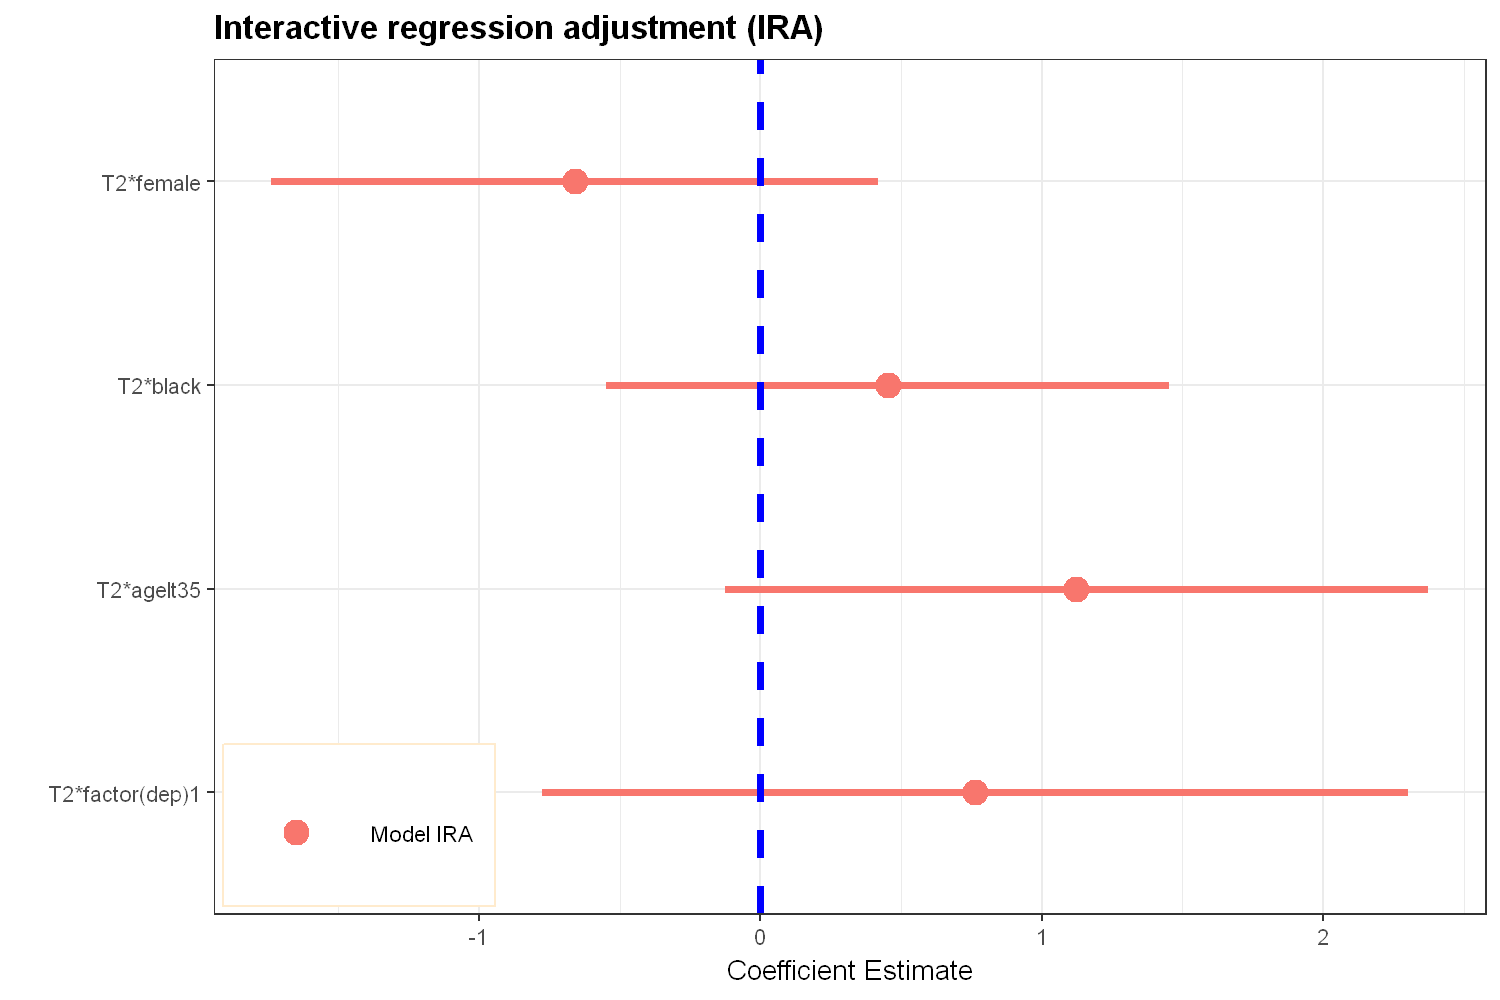

In [35]:
options(repr.plot.width=3, repr.plot.height=2 ,  repr.plot.res = 500)
dwplot(coef_ira , 
       vline = geom_vline(
           xintercept = 0,
           colour = "blue",
           linetype = 2
       ),
       vars_order = c( "T2TRUE:Xfemale" , "T2TRUE:Xblack" , "T2TRUE:Xagelt35" , "T2TRUE:Xfactor(dep)1" )
       ) %>% # plot line at zero _behind_coefs
    relabel_predictors(
        c(
            "T2TRUE:Xfemale" = "T2*female",
            "T2TRUE:Xblack" = "T2*black",
            "T2TRUE:Xagelt35" = "T2*agelt35",
            "T2TRUE:Xfactor(dep)1" = "T2*factor(dep)1"
        )
    ) +
    theme_bw(base_size = 4) + 
    # Setting `base_size` for fit the theme
    # No need to set `base_size` in most usage
    xlab("Coefficient Estimate") + ylab("") +
    geom_vline(xintercept = 0,
               colour = "blue",
               linetype = 2) +
    ggtitle("Interactive regression adjustment (IRA) ") +
    theme(
        plot.title = element_text(face = "bold"),
        legend.position = c(0.007, 0.01),
        legend.justification = c(0, 0),
        legend.background = element_rect(colour = "blanchedalmond"),
        legend.title = element_blank()
    )

It can be observed that the intervals of the coefficients cross 0; that is, they contain positive and negative values, so the hypotheses cannot be rejected.